In [15]:
import re
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import poisson
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [4]:
# Load the dataset
df = pd.read_csv('iphone.csv')

In [5]:
# 1. Clean the dataset
# Check for missing values and drop or fill them accordingly
df.dropna(inplace=True)

In [7]:
# 2. Feature Engineering
# Create new features, e.g., length of review, sentiment analysis, etc.
df['review_length'] = df['reviewDescription'].apply(len)

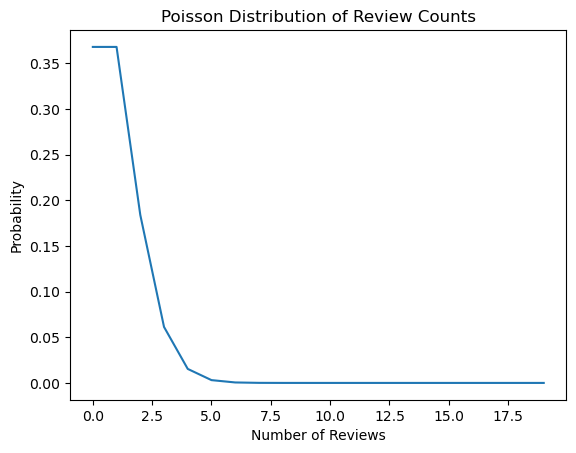

In [8]:
# 3. Poisson Distribution Analysis (Example: Count of reviews)
review_counts = df['reviewDescription'].count()
lambda_param = review_counts / len(df)  # Average rate (lambda)
poisson_dist = poisson.pmf(np.arange(0, 20), lambda_param)

plt.plot(np.arange(0, 20), poisson_dist)
plt.title('Poisson Distribution of Review Counts')
plt.xlabel('Number of Reviews')
plt.ylabel('Probability')
plt.show()

/Users/akshobhy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


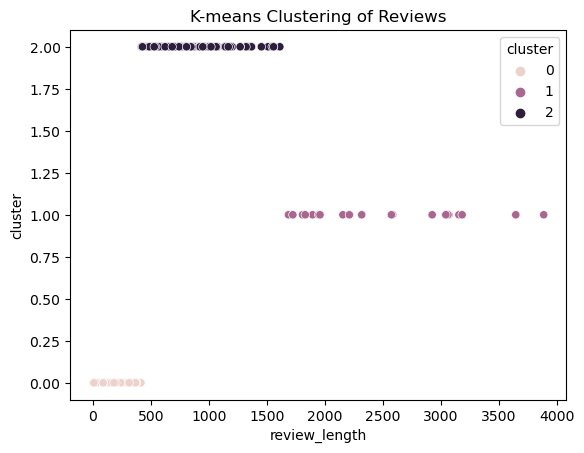

In [9]:
# 4. K-means Clustering
# Assuming we want to cluster based on review length and sentiment score (if available)
X = df[['review_length']]  # Add more features as needed
kmeans = KMeans(n_clusters=3)  # Choose number of clusters
df['cluster'] = kmeans.fit_predict(X)

sns.scatterplot(data=df, x='review_length', y='cluster', hue='cluster')
plt.title('K-means Clustering of Reviews')
plt.show()

In [11]:
# 5. Temporal Analysis (if there's a date column)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df.resample('M').count()['reviewDescription'].plot()
    plt.title('Monthly Review Counts')
    plt.ylabel('Number of Reviews')
    plt.show()

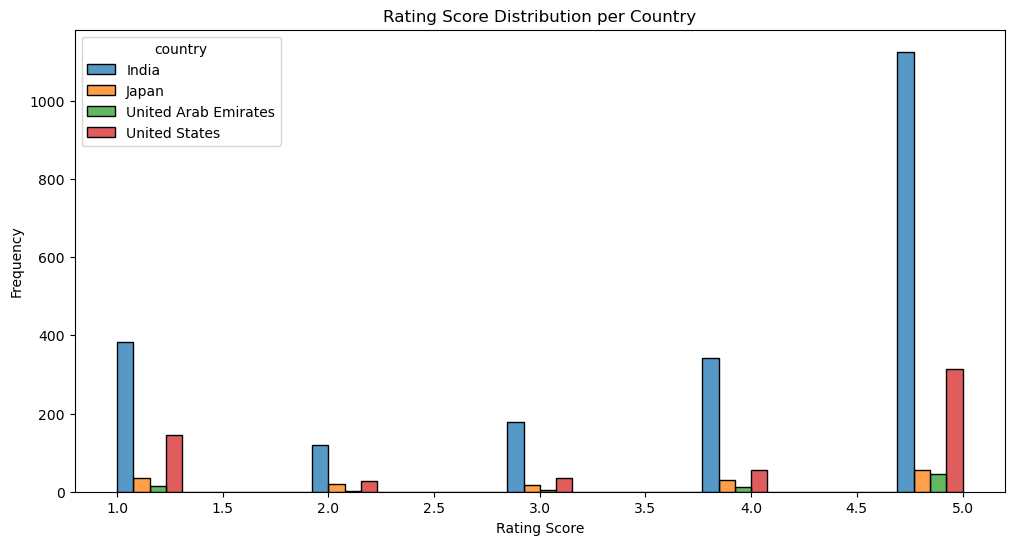

In [13]:
# 6. Rating score distibution per country (India, Japan, United Arab, Egypt, United States)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(x='ratingScore', hue='country', data=df, multiple="dodge")
plt.title('Rating Score Distribution per Country')
plt.xlabel('Rating Score')
plt.ylabel('Frequency')
plt.show()

In [14]:
# 7. # Group data by country and rating score, then count occurrences
rating_counts = df.groupby(['country', 'ratingScore']).size().unstack(fill_value=0)

# Display the table
rating_counts

ratingScore,1,2,3,4,5
country,,,,,
India,382,120,177,342,1125
Japan,35,21,17,30,55
United Arab Emirates,15,2,4,13,46
United States,144,28,36,55,313
